In [2]:
!pip install plotly_express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)


In [3]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


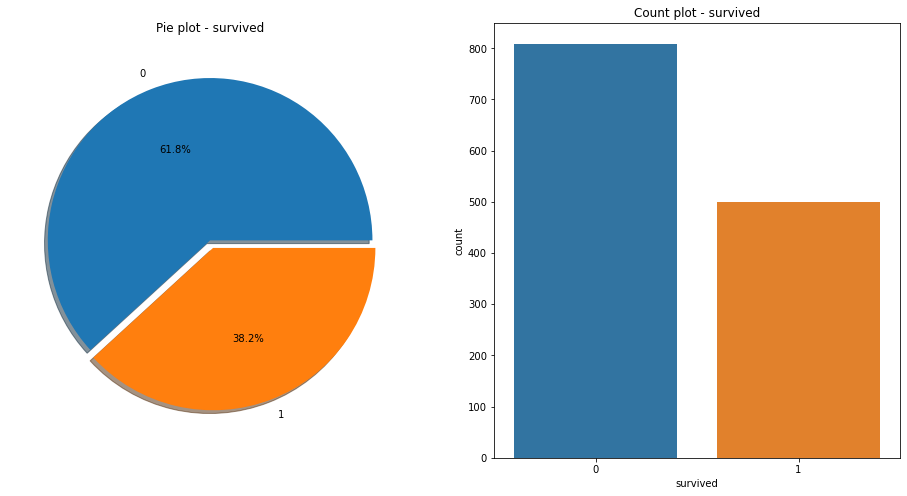

In [17]:
f, ax = plt.subplots(1, 2, figsize=(16, 8)) 

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])  # autopct~ :  소숫점 첫째자리까지 
ax[0].set_title('Pie plot - survived')  # ax[0] 은 첫번째 plot 의미 
ax[0].set_ylabel('')

sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


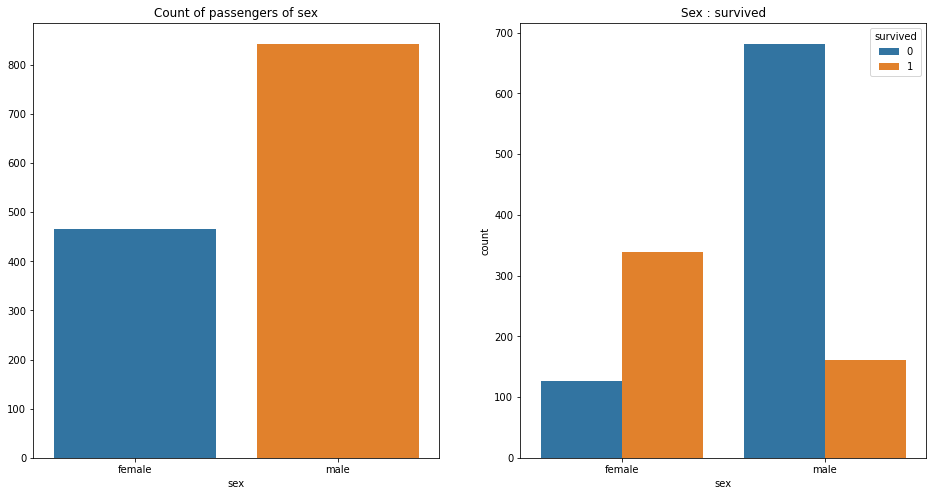

In [18]:
# 성별에 따른 생존 현황
f, ax = plt.subplots(1, 2, figsize=(16, 8)) 

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers of sex')  
ax[0].set_ylabel('')

sns.countplot('sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex : survived')

plt.show()

In [21]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


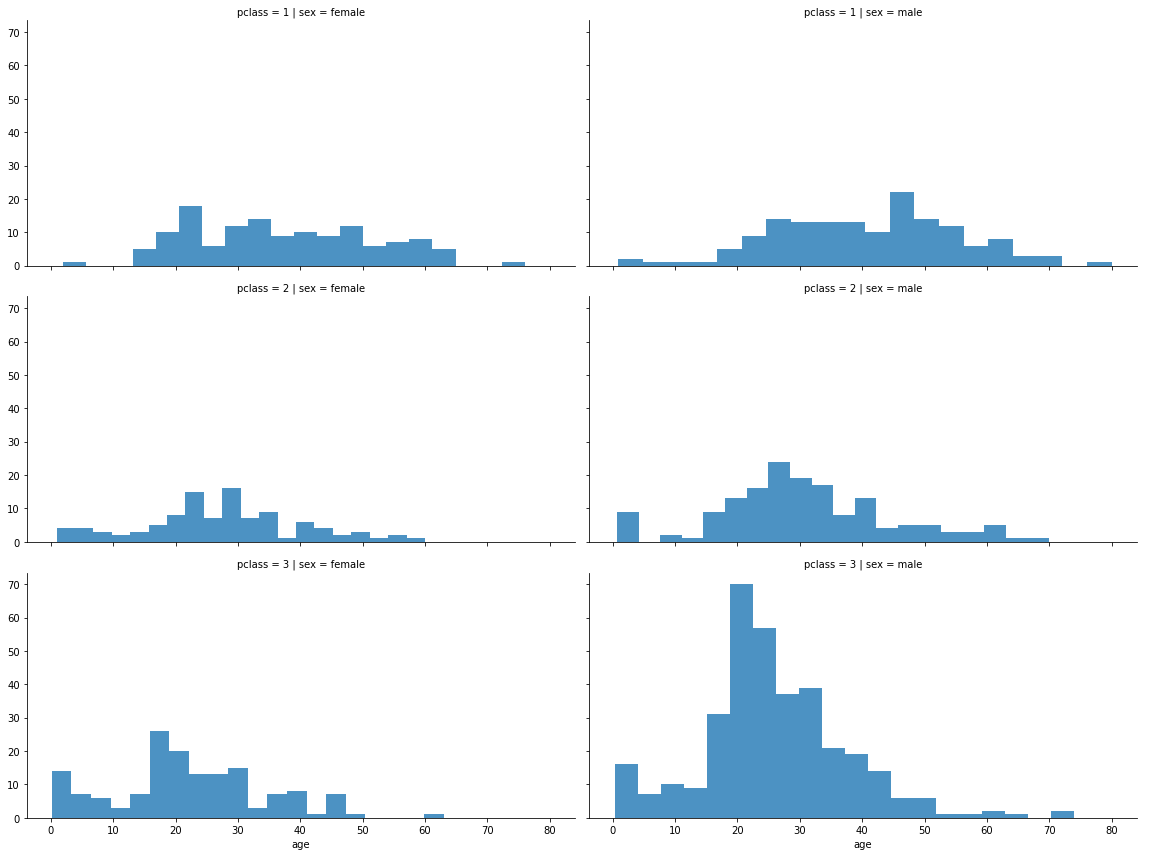

In [27]:
# 선실 등급별 성별 현황 
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2) # FacetGrid 기능 
grid.map(plt.hist, 'age', alpha=0.8, bins=20)  # 히스토그램
grid.add_legend();

In [23]:
# 나이별 승객 생존 현황
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

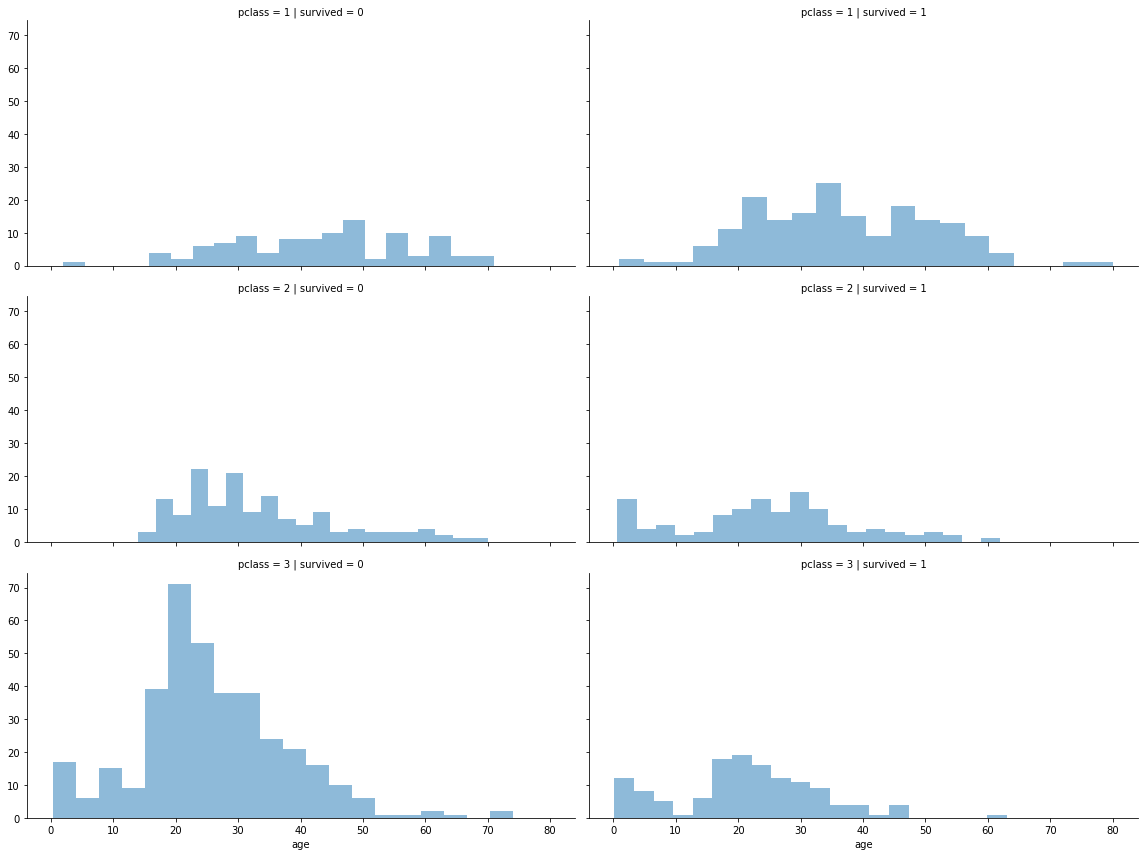

In [24]:
# 등실별 생존률을 연령별로 관찰 
gird = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2) # survived=0  생존하지 못한 사람 
gird.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [26]:
# pd.cut :  bins[구간], labels[구간의 이름] >> 구간에 따른 데이터 프레임 생성 
# bins =  숫자 >> 숫자가 커질 수록 더 구간이 촘촘해 진다. 
# 나이를 5단계로 정리 
titanic['age_cat'] = pd.cut(titanic['age'], 
                            bins=[0,7,15,30,60,100], include_lowest=True, 
                            labels=['baby', 'teen', 'young', 'adult', 'old'])
                        
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



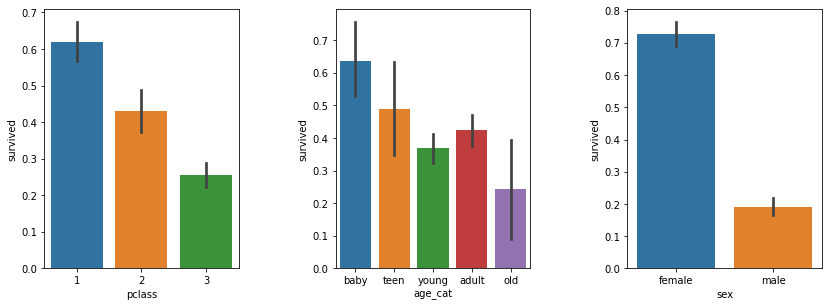

In [31]:
# 나이, 성별 ,등급별 생존자 수 한번에 파악 
plt.figure(figsize=(14, 6))
plt.subplot(131)  # 1행 3열 중에서 첫 번째 
sns.barplot('pclass', 'survived', data=titanic)
plt.subplot(132)  # 1행 3열 중에서 두 번째
sns.barplot('age_cat', 'survived', data=titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



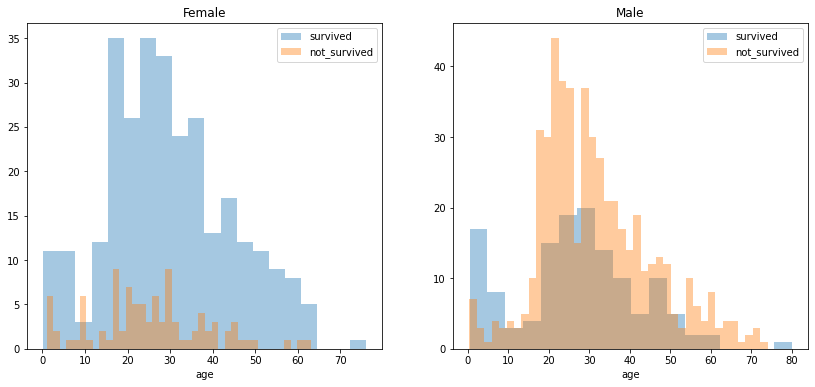

In [36]:
# 남여 나이별 생존 상황
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.distplot(women[women['survived']==1]['age'], bins=20,
                label = 'survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins=40,
                label = 'not_survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')
            
ax = sns.distplot(men[men['survived']==1]['age'], bins=18,
                label = 'survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['survived']==0]['age'], bins=40,
                label = 'not_survived', ax=axes[1], kde=False)
ax.legend(); ax=ax.set_title('Male')

In [33]:
# 탑승객의 이름에서 신분을 알 수 있다. 
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [34]:
# 정규식을 이용해서 문장 사이의 신분에 대한 정보 얻기
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx)
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())  # 형식: 콤마로 시작하고(\,) 한 칸을 비우고(\s) 글자가 나오고(\w+) 단어가 두개일수도 하나일수도((\s\w+)?)

0
, Miss.
1
, Master.
2
, Miss.
3
, Mr.
4
, Mrs.
5
, Mr.
6
, Miss.
7
, Mr.
8
, Mrs.
9
, Mr.
10
, Col.
11
, Mrs.
12
, Mme.
13
, Miss.
14
, Mr.
15
, Mr.
16
, Mr.
17
, Mrs.
18
, Miss.
19
, Mr.
20
, Mr.
21
, Mrs.
22
, Mr.
23
, Miss.
24
, Miss.
25
, Mr.
26
, Mr.
27
, Mrs.
28
, Miss.
29
, Mr.
30
, Mr.
31
, Mr.
32
, Miss.
33
, Miss.
34
, Mr.
35
, Miss.
36
, Miss.
37
, Mr.
38
, Mr.
39
, Mr.
40
, Dr.
41
, Mrs.
42
, Mrs.
43
, Mrs.
44
, Miss.
45
, Major.
46
, Mr.
47
, Mr.
48
, Mrs.
49
, Mr.
50
, Mrs.
51
, Mr.
52
, Mr.
53
, Mr.
54
, Master.
55
, Miss.
56
, Mr.
57
, Mrs.
58
, Mr.
59
, Mrs.
60
, Mr.
61
, Mrs.
62
, Mr.
63
, Mrs.
64
, Mr.
65
, Mrs.
66
, Miss.
67
, Miss.
68
, Mr.
69
, Mrs.
70
, Mr.
71
, Mr.
72
, Mrs.
73
, Miss.
74
, Mr.
75
, Mr.
76
, Miss.
77
, Mr.
78
, Mrs.
79
, Mrs.
80
, Mr.
81
, Capt.
82
, Miss.
83
, Mrs.
84
, Mr.
85
, Mrs.
86
, Mr.
87
, Mr.
88
, Miss.
89
, Mr.
90
, Mrs.
91
, Mr.
92
, Mrs.
93
, Dr.
94
, Master.
95
, Mrs.
96
, Mr.
97
, Mrs.
98
, Mrs.
99
, Lady.
100
, Sir.
101
, Mr.
1

In [37]:
# 사회적 신분 
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [38]:
# 성별 별 신분 확인 
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [42]:
# 평민과 귀족으로 나눠서 성별별  사회적 신분 정리 
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']

Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [43]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.636364
4,Rare_m,0.443038


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [45]:
# 머신러닝을 위해 해당 컬럼을 숫자로 변경
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # 문자를 숫자로 바꿔준다.
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])  # titanic['sex']를 숫자로 변환해서 gender 컬럼생성
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [47]:
# 전체 데이터는 1309개인데 age 데이터는 1046개로 결측치가 존재하기 때문에 결측치 제거 
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


<AxesSubplot:>

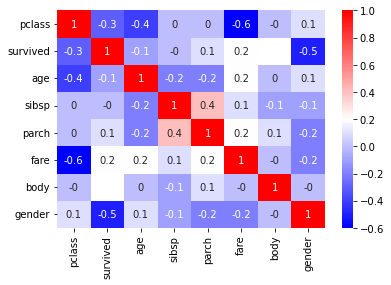

In [49]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [51]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)  # 특성과 라벨을 주고 학습시킴 

DecisionTreeClassifier(max_depth=4, random_state=13)

In [57]:
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [62]:
# 'pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'
# 디카프리오의 생존률

import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])  #  디카프리오의 컬럼별 특성 입력 
print('Decaprio : ', dt.predict_proba(dicaprio)[0, 1])  # 생존확률을 구하기 위해 predict_proba 사용 

Decaprio :  0.16728624535315986


C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [64]:
# 윈슬릿의 생존률

import numpy as np

dicaprio = np.array([[1, 16, 1, 1, 100, 0]])  
print('Winslet : ', dt.predict_proba(dicaprio)[0, 1])

Winslet :  1.0


C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

